In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Part 1

## Fetch and plot the data


In [169]:
start = "2024-01-01"
end = "2024-11-01"
interval = "1d"
symbols = ["BTC", "ETH", "XRP", "BNB", "SOL"]

initial_capital = 1000
trans_fee = 0.005

In [170]:
def get_asset_history(symbol, start, end, interval):
  ticker = yf.Ticker(symbol)
  ticker_df = ticker.history(start = start, end = end, interval = interval)
  return ticker_df["Close"]

In [171]:
price_data = {}

for symbol in symbols:
  price_data[symbol] = get_asset_history(symbol + "-USD", start, end, interval)

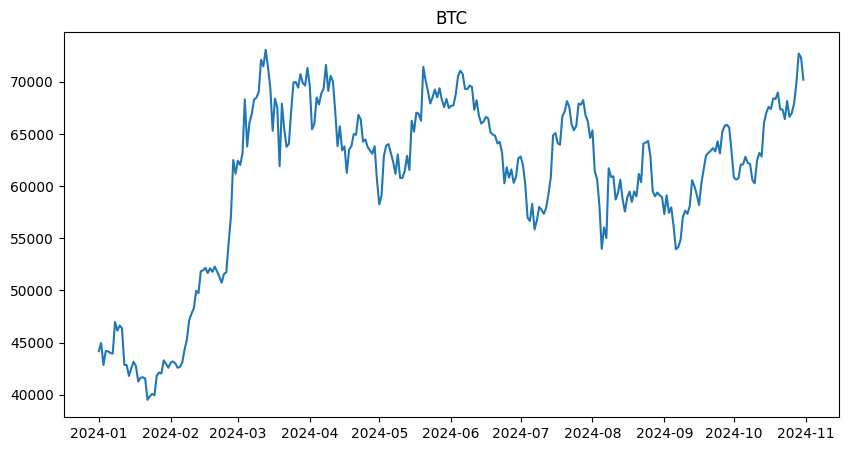

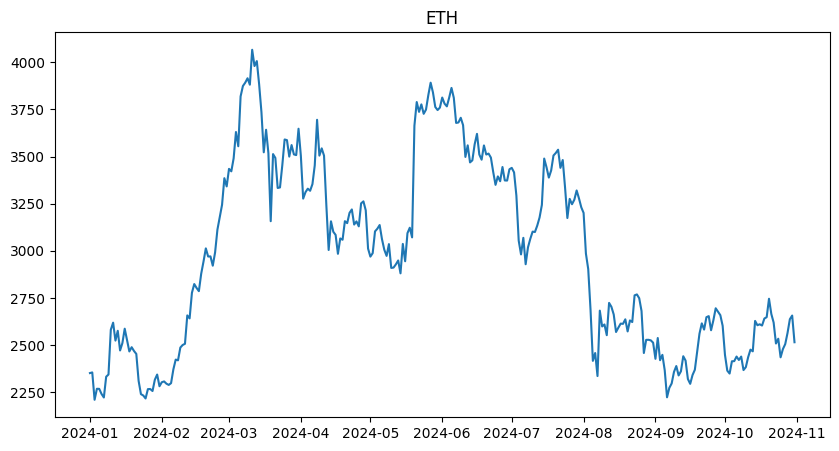

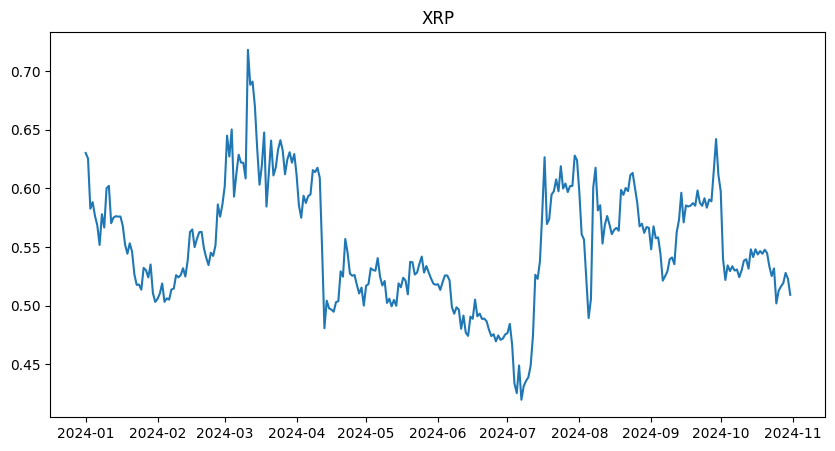

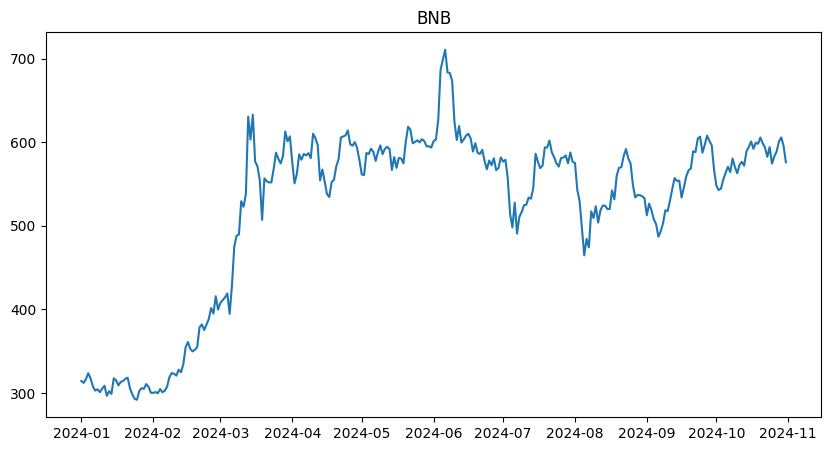

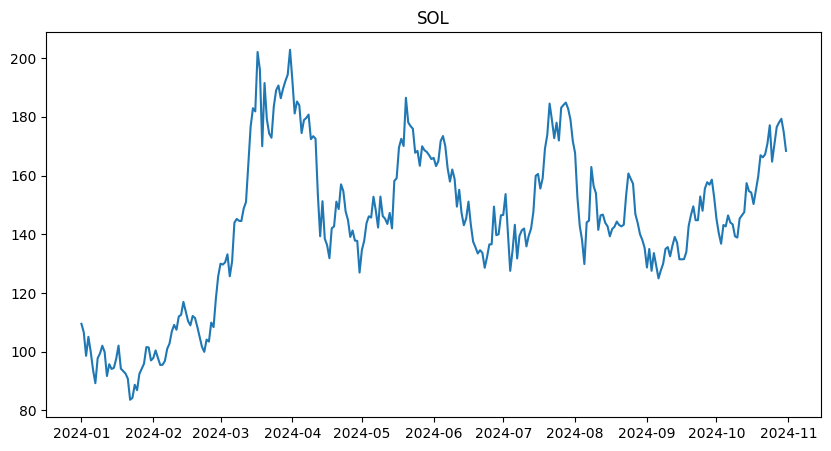

In [172]:

for symbol in symbols:
  plt.figure(figsize = (10, 5))
  plt.plot(price_data[symbol])
  plt.title(symbol)

plt.show()

In [173]:
price_df = pd.DataFrame(price_data)
price_df

,BTC,ETH,XRP,BNB,SOL
Date,,,,,
2024-01-01 00:00:00+00:00,44167.332031,2352.327881,0.630082,314.408295,109.508682
2024-01-02 00:00:00+00:00,44957.968750,2355.836426,0.625363,312.103821,106.611221
2024-01-03 00:00:00+00:00,42848.175781,2210.761963,0.582580,316.661285,98.594437
2024-01-04 00:00:00+00:00,44179.921875,2269.038086,0.588226,323.600006,105.077538
2024-01-05 00:00:00+00:00,44162.691406,2268.647217,0.576486,317.450287,99.978790
...,...,...,...,...,...
2024-10-27 00:00:00+00:00,67929.296875,2505.940674,0.516381,588.715820,176.549194
2024-10-28 00:00:00+00:00,69907.757812,2565.348145,0.519227,600.596069,178.104904
2024-10-29 00:00:00+00:00,72720.492188,2637.957520,0.527916,605.668274,179.360748


## Function for generating random weights

In [174]:
def generate_random_weights(num):
  np.random.seed(42)
  weights = np.random.random(num)
  weights /= np.sum(weights)
  return weights

## **Function for implementing Buy And Hold strategy with random weights**

In [175]:
def buy_and_hold_with_random_weights(symbols, initial_capital, data):
  weights = generate_random_weights(len(symbols))

  investment_amounts = initial_capital * weights
  initial_prices = data.iloc[0]

  shares = (investment_amounts * (1 - trans_fee)) / initial_prices

  final_prices = data.iloc[-1]
  final_portfolio_value = np.sum(shares * final_prices)

  portfolio_values = (data * shares).sum(axis = 1)

  print("Generated weights: ")
  for s, w in zip(symbols, weights):
    print(f"{s}: {w:.4f}")
  print(50 * '-')

  print("Shares bought:")
  print(shares)
  print(50 * '-')

  print("Final portfolio value: ${:.2f}".format(final_portfolio_value))

  return weights, portfolio_values

## Functions for calculating strategy evaluation metrics & evaluating the results

In [176]:
def calculate_daily_returns(portfolio_values):
  return portfolio_values.pct_change().dropna()

def calculate_expected_return(daily_returns):
  return daily_returns.mean() * 252

def calculate_risk(daily_returns):
  var = daily_returns.var()
  std_dev = np.sqrt(var)

  return var, std_dev

def calculate_maximum_drawdown(daily_returns):
  cumulative_returns = (daily_returns + 1).cumprod()
  peak = cumulative_returns.cummax()
  drawdown = (cumulative_returns - peak) / peak
  max_drawdown = drawdown.min()

  return max_drawdown

def calculate_sharpe(daily_returns, risk_free = 0.01):
  expected_return = calculate_expected_return(daily_returns)
  std_dev = daily_returns.std()
  annualized_volatility = std_dev * np.sqrt(252)

  sharpe = (expected_return - risk_free) / annualized_volatility
  return sharpe

In [177]:
def evaluate(portfolio_values):
  daily_returns = calculate_daily_returns(portfolio_values)

  expected_return = calculate_expected_return(daily_returns)

  var, std_dev = calculate_risk(daily_returns)

  maximum_drawdown = calculate_maximum_drawdown(daily_returns)

  sharpe_ratio = calculate_sharpe(daily_returns)

  print("Expected return {:.2f}%".format(expected_return * 100))
  print(15 * '-')

  print("Variance: {:.4f}".format(var))
  print("Standard deviation: {:.4f}".format(std_dev))
  print(15 * '-')

  print("Maximum drawdown: {:.4f}".format(maximum_drawdown))
  print(15 * '-')

  print("Sharpe ratio: {:.2f}".format(sharpe_ratio))

## Perform Buy And Hold with random weights

In [178]:
weights, portfolio_values = buy_and_hold_with_random_weights(symbols, initial_capital, price_df)

Generated weights: 
BTC: 0.1332
ETH: 0.3381
XRP: 0.2603
BNB: 0.2129
SOL: 0.0555
--------------------------------------------------
Shares bought:
BTC      0.003001
ETH      0.143012
XRP    411.083152
BNB      0.673759
SOL      0.504135
Name: 2024-01-01 00:00:00+00:00, dtype: float64
--------------------------------------------------
Final portfolio value: $1252.84


### evaluate and plot the results

In [179]:
evaluate(portfolio_values)

Expected return 28.23%
---------------
Variance: 0.0007
Standard deviation: 0.0269
---------------
Maximum drawdown: -0.3147
---------------
Sharpe ratio: 0.64


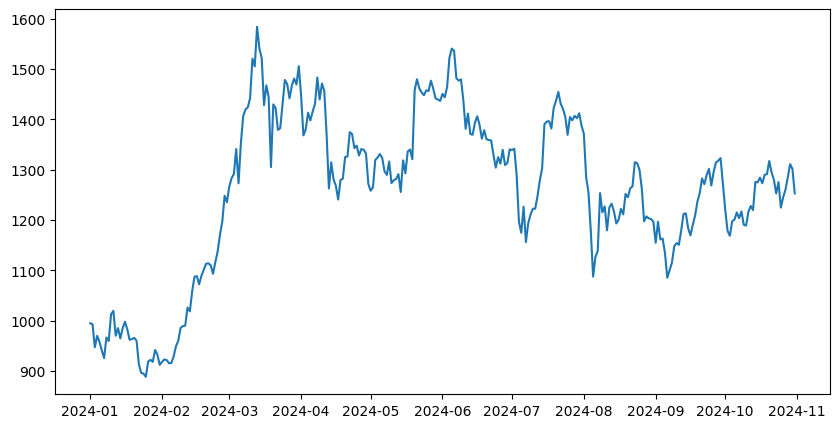

In [180]:
plt.figure(figsize = (10, 5))
plt.plot(portfolio_values)
plt.show()

## **Function for implementing Buy And Hold strategy with the optimal weights calculated by the *MPT* model**


In [181]:
from scipy.optimize import minimize

In [182]:
def portfolio_volatility(weights, cov_matrix):
  return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [183]:
def buy_and_hold_with_mpt(symbols, data, initial_capital, weights):
  constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
  bounds = [(0, 1) for _ in symbols]

  init_guess = [1./len(symbols) for _ in symbols]
  returns = data.pct_change().dropna()
  cov_matrix = returns.cov()
  opt_results = minimize(portfolio_volatility,
                        init_guess,
                        args = cov_matrix,
                        method = "SLSQP",
                        bounds = bounds,
                        constraints = constraints)

  optimal_weights = opt_results.x

  opt_investment_amounts = initial_capital * optimal_weights
  initial_prices = data.iloc[0]

  opt_shares = (opt_investment_amounts * (1 - trans_fee)) / initial_prices

  final_prices = data.iloc[-1]
  opt_final_portfolio_value = np.sum(opt_shares * final_prices)


  opt_portfolio_values = (data * opt_shares).sum(axis = 1)

  print("Optimal Weights:")
  for w, symbol in zip(optimal_weights, symbols):
    print(f"{symbol}: {w:.4f}")
  print(50 * '-')

  print("Shares bought:")
  for i in opt_shares.index:
    print(f"{i}: {opt_shares[i]:.4f}")
  print(50 * '-')

  print("Optimal final portfolio value: ${:.2f}".format(opt_final_portfolio_value))

  return optimal_weights, opt_portfolio_values

## Perform Buy And Hold with the optimal weights claculated by the MPT model

In [184]:
opt_weights, opt_portfolio_values = buy_and_hold_with_mpt(symbols, price_df, initial_capital, weights)

Optimal Weights:
BTC: 0.4199
ETH: 0.0000
XRP: 0.2470
BNB: 0.3331
SOL: 0.0000
--------------------------------------------------
Shares bought:
BTC: 0.0095
ETH: 0.0000
XRP: 389.9774
BNB: 1.0542
SOL: 0.0000
--------------------------------------------------
Optimal final portfolio value: $1470.10


### Evaluate and plot the results

In [185]:
evaluate(opt_portfolio_values)

Expected return 40.51%
---------------
Variance: 0.0006
Standard deviation: 0.0254
---------------
Maximum drawdown: -0.2671
---------------
Sharpe ratio: 0.98


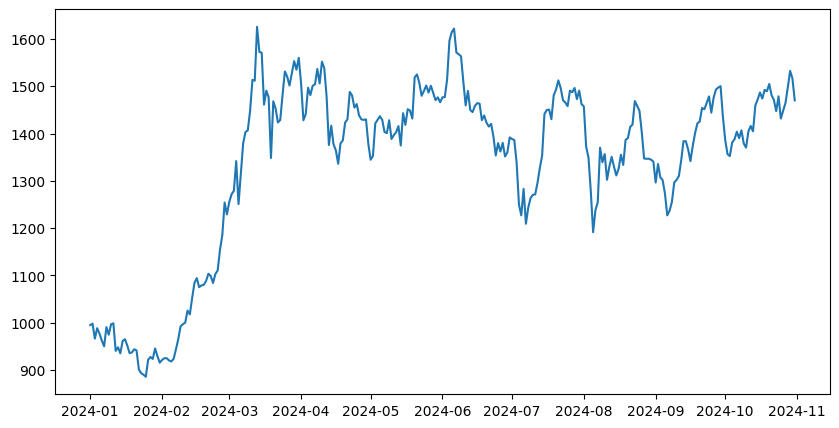

In [186]:
plt.figure(figsize = (10, 5))
plt.plot(opt_portfolio_values)
plt.show()

## Comparison by plotting both scenarios

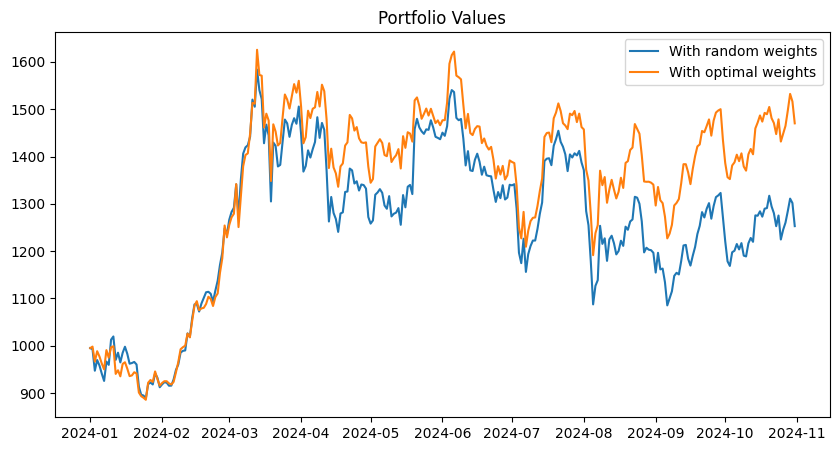

In [187]:
plt.figure(figsize = (10, 5))

plt.plot(portfolio_values, label = "With random weights")
plt.plot(opt_portfolio_values, label = "With optimal weights")

plt.title("Portfolio Values")
plt.legend()
plt.show()

# Test for different periods
## (we will use bitcoin a representative index for market trends)

In [188]:
bull_period = ("2024-01-20", "2024-03-12")
bear_period = ("2024-05-15", "2024-07-07")
volatile_period = ("2024-07-10", "2024-11-01")

## Identify the bullish, bearish and volatile periods in the market



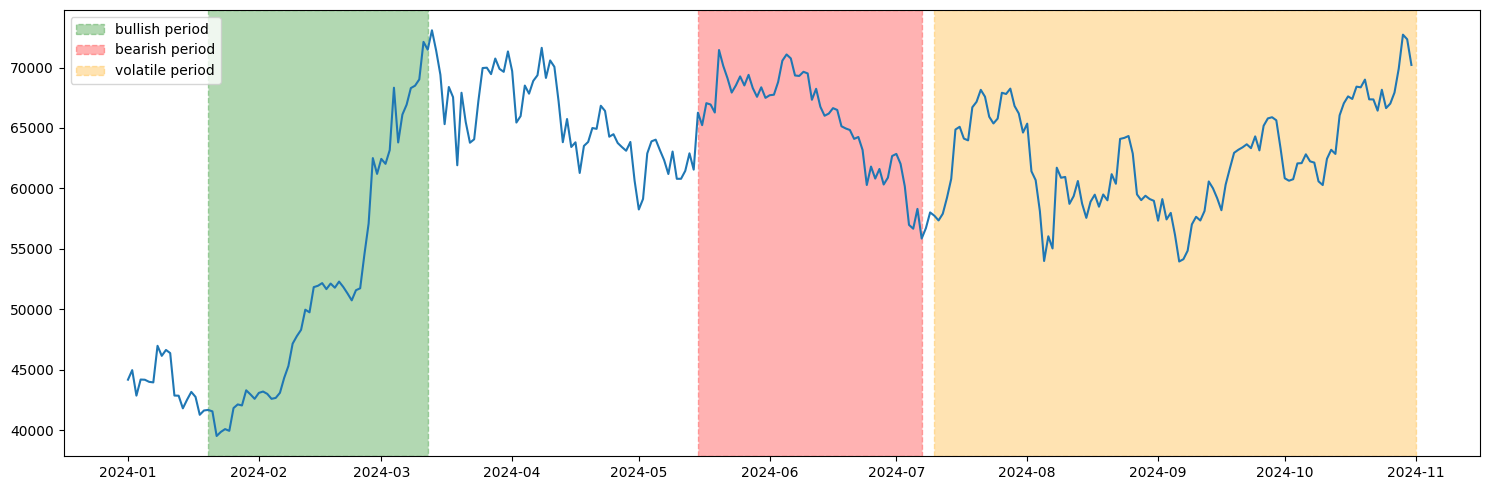

In [189]:
plt.figure(figsize = (15, 5))

plt.plot(price_df["BTC"])

plt.axvspan(pd.to_datetime(bull_period[0]), pd.to_datetime(bull_period[1]), linestyle = '--', color = "green", alpha = 0.3, label = "bullish period")

plt.axvspan(pd.to_datetime(bear_period[0]), pd.to_datetime(bear_period[1]), linestyle = '--', color = "red", alpha = 0.3, label = "bearish period")

plt.axvspan(pd.to_datetime(volatile_period[0]), pd.to_datetime(volatile_period[1]), linestyle = '--', color = "orange", alpha = 0.3, label = "volatile period")

plt.tight_layout()
plt.legend()
plt.show()

## Extract the needed ranges from historical data

In [190]:
periods = {
"bullish": price_df[(price_df.index >= bull_period[0]) & (price_df.index <= bull_period[1])],
"bearish": price_df[(price_df.index >= bear_period[0]) & (price_df.index <= bear_period[1])],
"volatile": price_df[(price_df.index >= volatile_period[0]) & (price_df.index <= volatile_period[1])],
}

## Test for each period

Test in bullish market:

Generated weights: 
BTC: 0.1332
ETH: 0.3381
XRP: 0.2603
BNB: 0.2129
SOL: 0.0555
--------------------------------------------------
Shares bought:
BTC      0.003181
ETH      0.136221
XRP    468.276866
BNB      0.668334
SOL      0.596384
Name: 2024-01-20 00:00:00+00:00, dtype: float64
--------------------------------------------------
Final portfolio value: $1541.38
--------------------------------------------------
Optimal Weights:
BTC: 0.1754
ETH: 0.4655
XRP: 0.1015
BNB: 0.2576
SOL: 0.0000
--------------------------------------------------
Shares bought:
BTC: 0.0042
ETH: 0.1875
XRP: 182.5871
BNB: 0.8087
SOL: 0.0000
--------------------------------------------------
Optimal final portfolio value: $1606.52



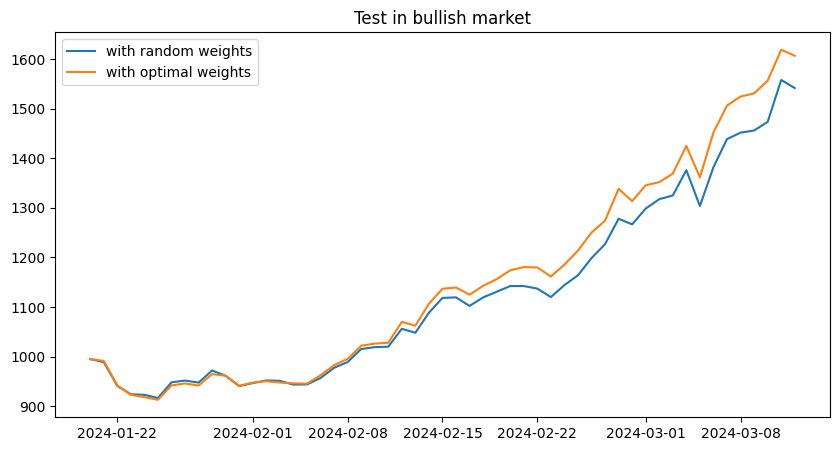

----------------------------------------------------------------------------------------------------
Test in bearish market:

Generated weights: 
BTC: 0.1332
ETH: 0.3381
XRP: 0.2603
BNB: 0.2129
SOL: 0.0555
--------------------------------------------------
Shares bought:
BTC      0.002000
ETH      0.110769
XRP    499.063794
BNB      0.363932
SOL      0.349000
Name: 2024-05-15 00:00:00+00:00, dtype: float64
--------------------------------------------------
Final portfolio value: $870.24
--------------------------------------------------
Optimal Weights:
BTC: 0.6863
ETH: 0.0000
XRP: 0.3137
BNB: 0.0000
SOL: 0.0000
--------------------------------------------------
Shares bought:
BTC: 0.0103
ETH: 0.0000
XRP: 601.3932
BNB: 0.0000
SOL: 0.0000
--------------------------------------------------
Optimal final portfolio value: $827.99



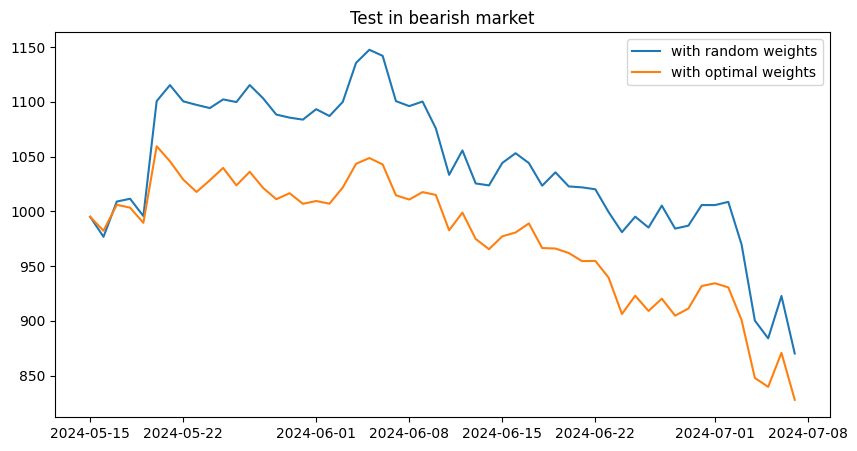

----------------------------------------------------------------------------------------------------
Test in volatile market:

Generated weights: 
BTC: 0.1332
ETH: 0.3381
XRP: 0.2603
BNB: 0.2129
SOL: 0.0555
--------------------------------------------------
Shares bought:
BTC      0.002295
ETH      0.108442
XRP    589.962815
BNB      0.403868
SOL      0.388852
Name: 2024-07-10 00:00:00+00:00, dtype: float64
--------------------------------------------------
Final portfolio value: $1032.54
--------------------------------------------------
Optimal Weights:
BTC: 0.3235
ETH: 0.0000
XRP: 0.2016
BNB: 0.4749
SOL: 0.0000
--------------------------------------------------
Shares bought:
BTC: 0.0056
ETH: 0.0000
XRP: 456.9334
BNB: 0.9009
SOL: 0.0000
--------------------------------------------------
Optimal final portfolio value: $1143.01



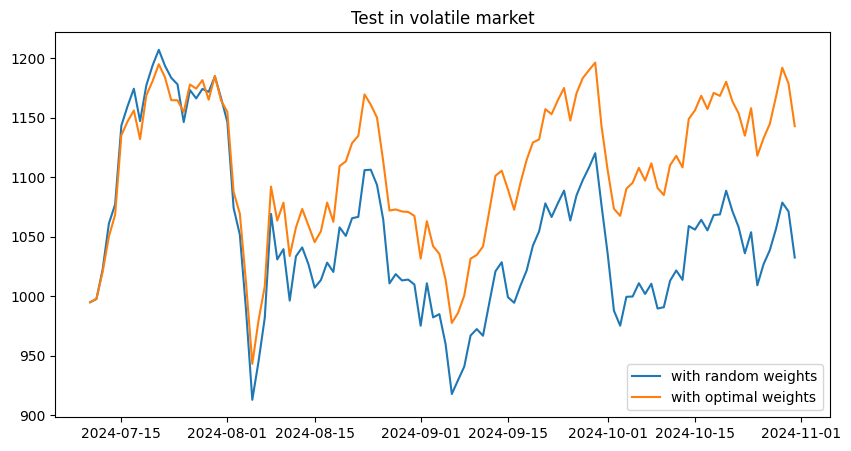

----------------------------------------------------------------------------------------------------


In [191]:
for period in periods.keys():

  print(f"Test in {period} market:\n")
  weights, ptf_values = buy_and_hold_with_random_weights(symbols, initial_capital, periods[period])
  print(50 * '-')
  opt_weights, opt_ptf_values = buy_and_hold_with_mpt(symbols, periods[period], initial_capital, weights)
  print()

  plt.figure(figsize = (10, 5))
  plt.plot(ptf_values, label = "with random weights")
  plt.plot(opt_ptf_values, label = "with optimal weights")

  plt.title(f"Test in {period} market")
  plt.legend()
  plt.show()

  print(100 * '-')

---

# Part 2


## Fetch and plot the data

In [192]:
start_date = "2024-11-02"
end_date = "2024-12-02"


In [193]:
price_data = {}

for symbol in symbols:
  price_data[symbol] = get_asset_history(symbol + '-USD', start = start_date, end = end_date, interval = '1d')

price_data = pd.DataFrame(price_data)

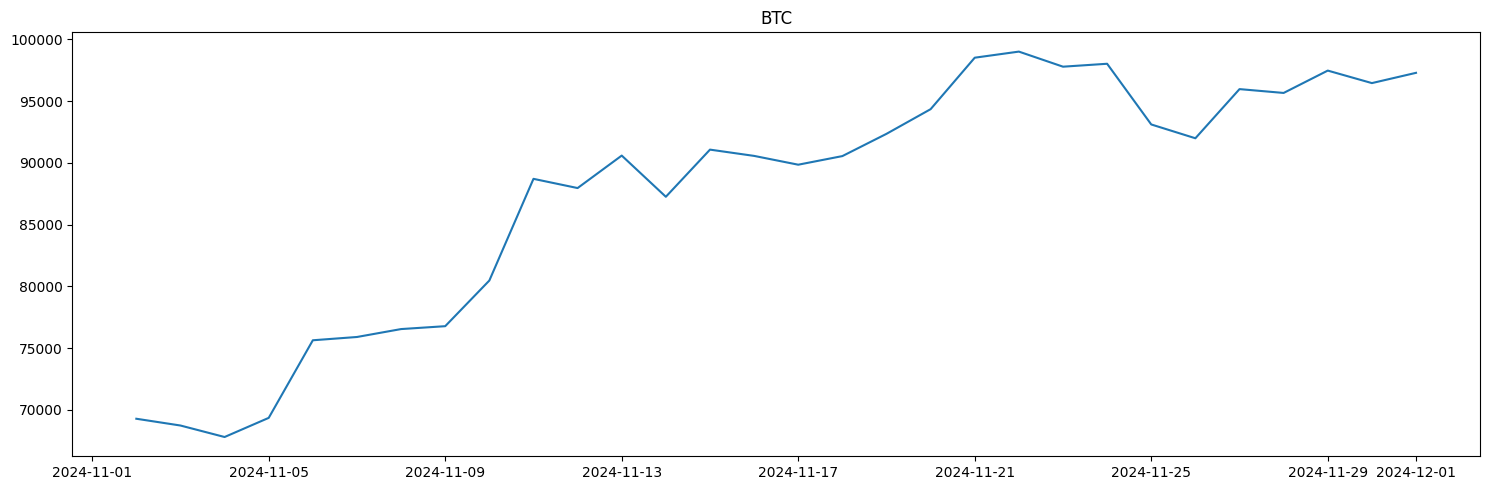

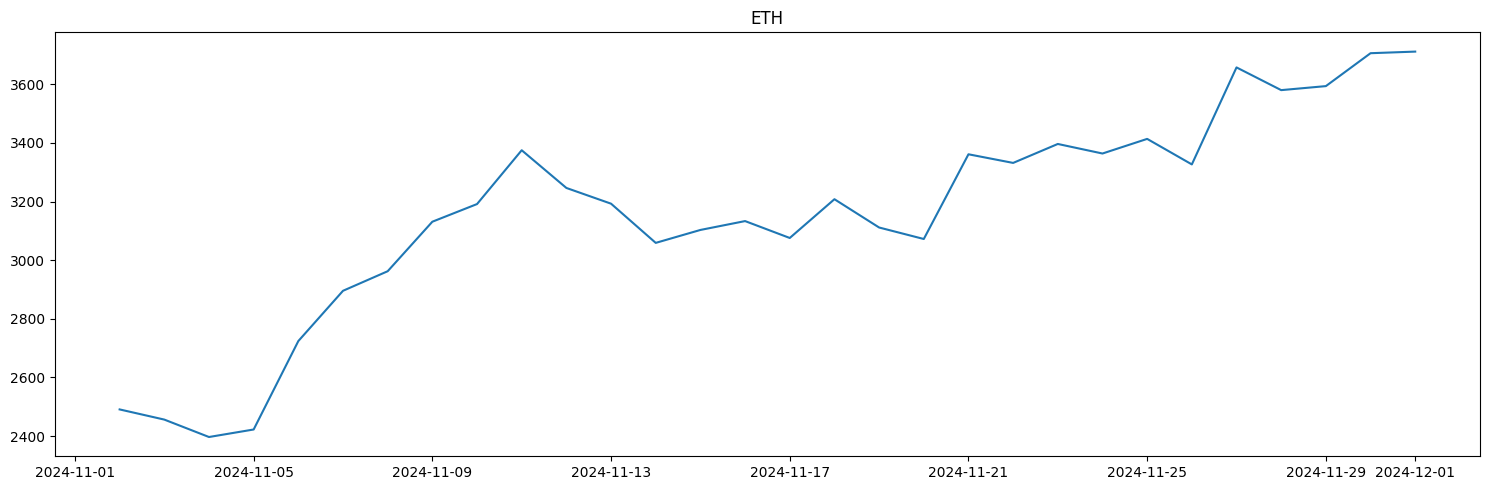

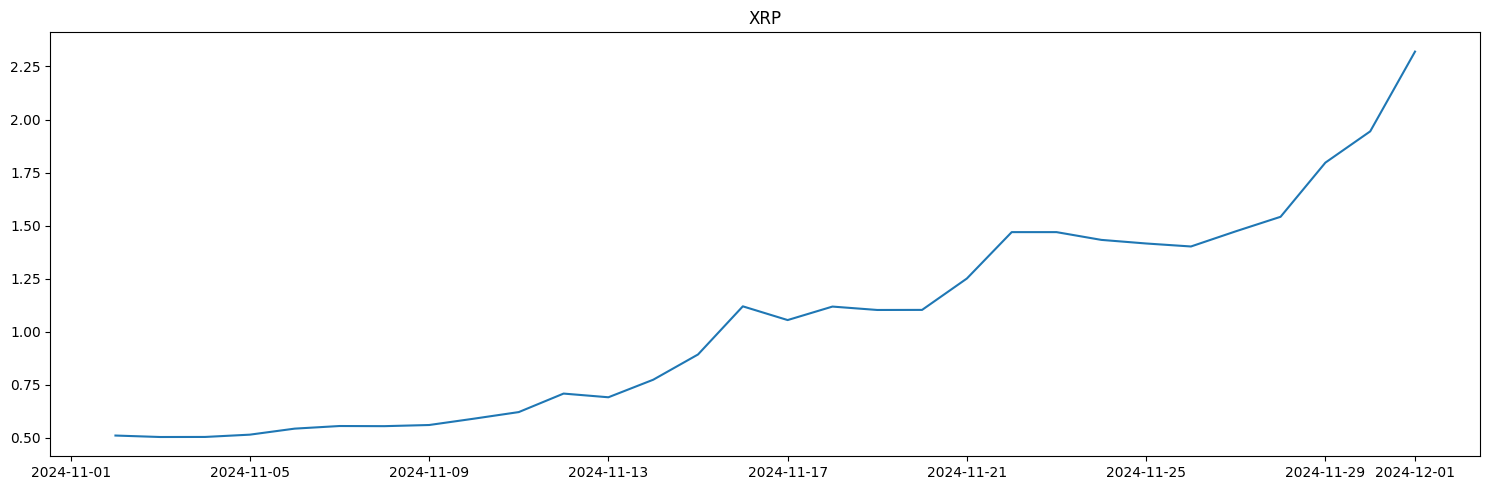

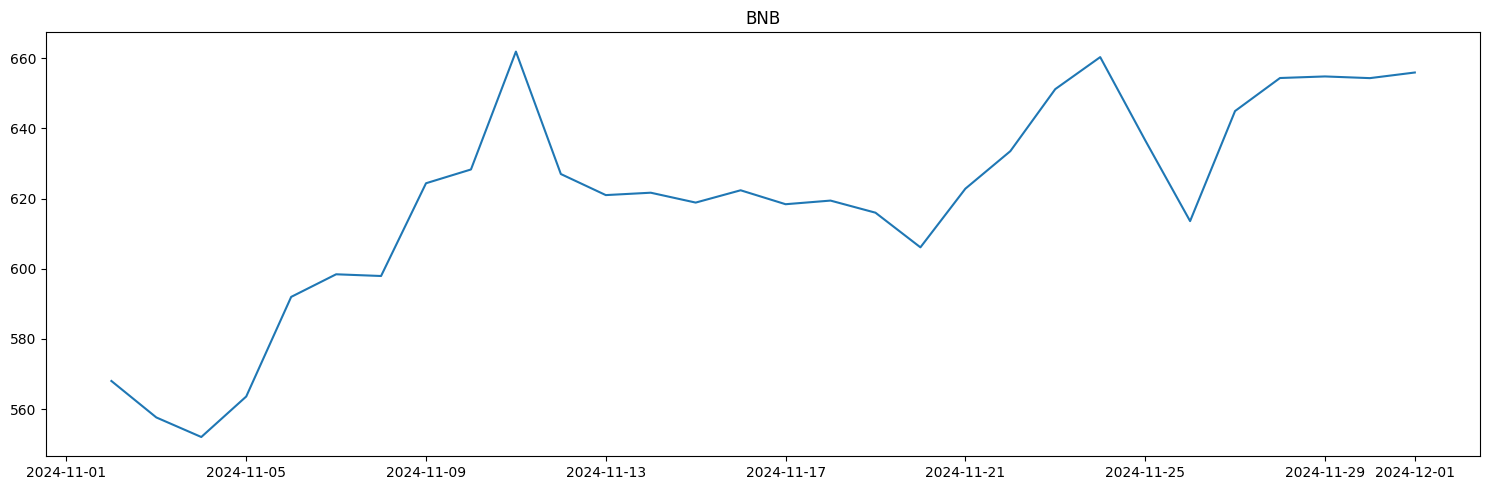

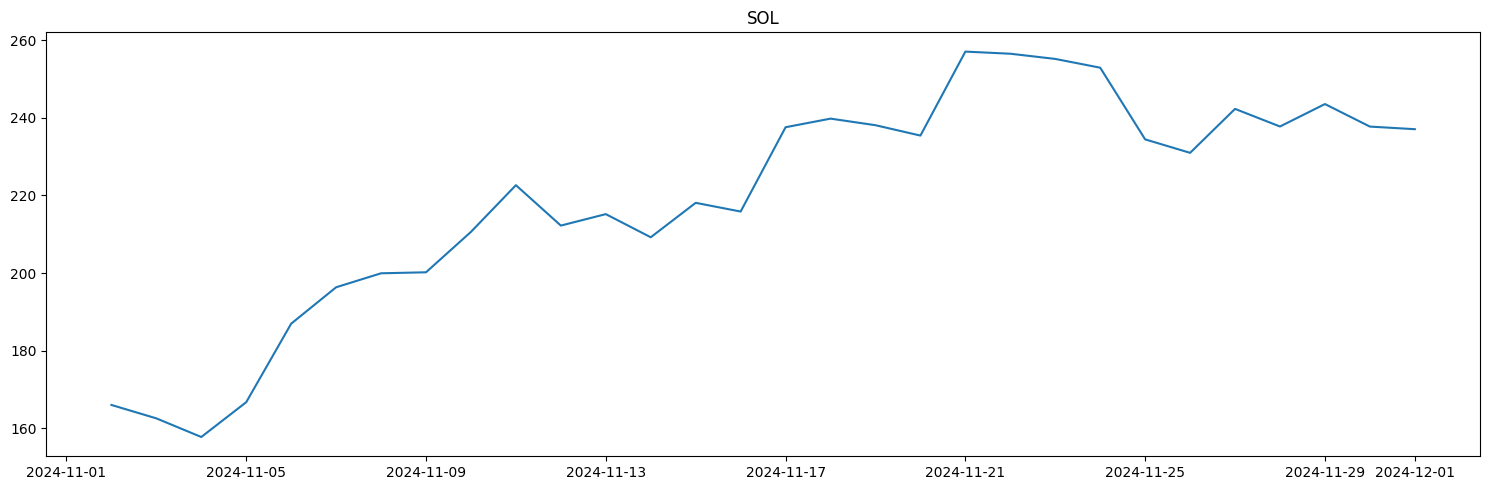

In [194]:
for symbol in symbols:
  plt.figure(figsize = (15, 5))
  plt.plot(price_data[symbol])
  plt.title(symbol)
  plt.tight_layout()

plt.show()

## Function for testing with random weights

In [195]:
def test_with_random_weights(symbols, weights, data, initial_capital):
  investment_amounts = initial_capital * weights
  initial_prices = data.iloc[0]

  shares = (investment_amounts * (1 - trans_fee)) / initial_prices

  final_prices = data.iloc[-1]
  final_portfolio_value = np.sum(shares * final_prices)

  portfolio_values = (data * shares).sum(axis = 1)

  print("Generated weights: ")
  for s, w in zip(symbols, weights):
    print(f"{s}: {w:.4f}")
  print(50 * '-')

  print("Shares bought:")
  print(shares)
  print(50 * '-')

  print("Final portfolio value: ${:.2f}".format(final_portfolio_value))

  return portfolio_values

## Function for testing with optimal weights calculated by MPT model

In [196]:
def test_with_optimal_weights(symbols, weights, data, initial_capital):
  opt_investment_amounts = initial_capital * weights
  initial_prices = data.iloc[0]

  opt_shares = (opt_investment_amounts * (1 - trans_fee)) / initial_prices

  final_prices = data.iloc[-1]
  opt_final_portfolio_value = np.sum(opt_shares * final_prices)


  opt_portfolio_values = (data * opt_shares).sum(axis = 1)

  print("Optimal Weights:")
  for w, symbol in zip(weights, symbols):
    print(f"{symbol}: {w:.4f}")
  print(50 * '-')

  print("Shares bought:")
  for i in opt_shares.index:
    print(f"{i}: {opt_shares[i]:.4f}")
  print(50 * '-')

  print("Optimal final portfolio value: ${:.2f}".format(opt_final_portfolio_value))

  return opt_portfolio_values

## Test with random weights

In [197]:
random_result = test_with_random_weights(symbols, weights, price_data, initial_capital)
print(50 * '-')
evaluate(random_result)

Generated weights: 
BTC: 0.1332
ETH: 0.3381
XRP: 0.2603
BNB: 0.2129
SOL: 0.0555
--------------------------------------------------
Shares bought:
BTC      0.001913
ETH      0.135047
XRP    508.024098
BNB      0.372925
SOL      0.332553
Name: 2024-11-02 00:00:00+00:00, dtype: float64
--------------------------------------------------
Final portfolio value: $2189.43
--------------------------------------------------
Expected return 712.16%
---------------
Variance: 0.0015
Standard deviation: 0.0385
---------------
Maximum drawdown: -0.0447
---------------
Sharpe ratio: 11.62


## Test with optimal weights

In [198]:
mpt_result = test_with_optimal_weights(symbols, opt_weights, price_data, initial_capital)
print(50 * '-')
evaluate(mpt_result)

Optimal Weights:
BTC: 0.3235
ETH: 0.0000
XRP: 0.2016
BNB: 0.4749
SOL: 0.0000
--------------------------------------------------
Shares bought:
BTC: 0.0046
ETH: 0.0000
XRP: 393.4709
BNB: 0.8319
SOL: 0.0000
--------------------------------------------------
Optimal final portfolio value: $1910.47
--------------------------------------------------
Expected return 586.20%
---------------
Variance: 0.0011
Standard deviation: 0.0330
---------------
Maximum drawdown: -0.0539
---------------
Sharpe ratio: 11.16


## Comparison by plotting both results

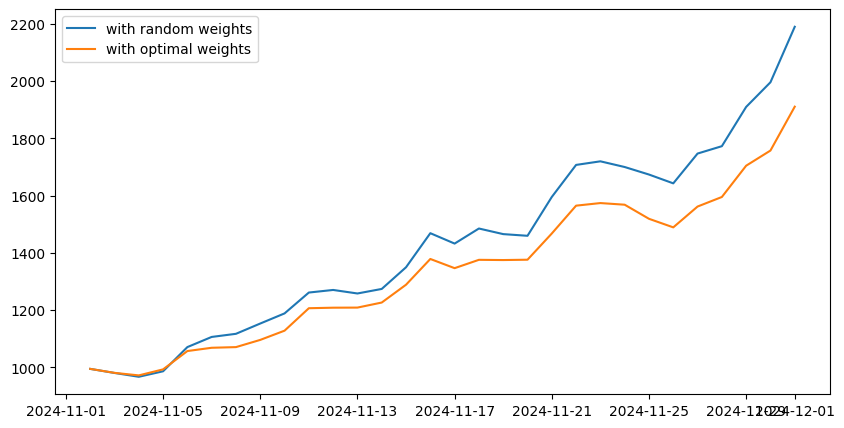

In [199]:
plt.figure(figsize = (10, 5))

plt.plot(random_result, label = "with random weights")
plt.plot(mpt_result, label = "with optimal weights")

plt.legend()
plt.show()


## Calculate the optimal weights for this interval

In [200]:
weights = generate_random_weights(len(symbols))
for s, w in zip(symbols, weights):
  print(f"{s}: {w:.4f}")

BTC: 0.1332
ETH: 0.3381
XRP: 0.2603
BNB: 0.2129
SOL: 0.0555


In [202]:
opt_weights_new, opt_portfolio_values_new = buy_and_hold_with_mpt(symbols, price_data, initial_capital, weights)


Optimal Weights:
BTC: 0.1773
ETH: 0.0000
XRP: 0.0714
BNB: 0.7513
SOL: 0.0000
--------------------------------------------------
Shares bought:
BTC: 0.0025
ETH: 0.0000
XRP: 139.3156
BNB: 1.3161
SOL: 0.0000
--------------------------------------------------
Optimal final portfolio value: $1434.15


In [203]:
evaluate(opt_portfolio_values_new)

Expected return 327.58%
---------------
Variance: 0.0007
Standard deviation: 0.0256
---------------
Maximum drawdown: -0.0616
---------------
Sharpe ratio: 8.03


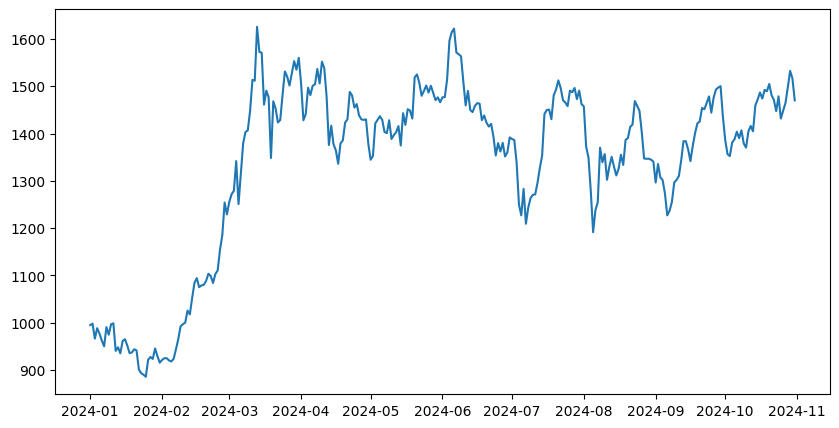

In [204]:
plt.figure(figsize = (10, 5))
plt.plot(opt_portfolio_values)
plt.show()

## Compare the weights

In [208]:
print("weights calculated in this part vs. weights calculated in previous part:")
for s, w1, w2 in zip(symbols, opt_weights, opt_weights_new):
  print(f"for {s}: part 1: {w1:.4f} | this part: {w2:.4f}")

weights calculated in this part vs. weights calculated in previous part:
for BTC: part 1: 0.3235 | this part: 0.1773
for ETH: part 1: 0.0000 | this part: 0.0000
for XRP: part 1: 0.2016 | this part: 0.0714
for BNB: part 1: 0.4749 | this part: 0.7513
for SOL: part 1: 0.0000 | this part: 0.0000
